In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python3)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/dago/anaconda3/envs/tp2/bin/python3 (found version "3.6.5") 
-- Found PythonLibs: /home/dago/anaconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2

In [11]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

/home/dago/Desktop/Facultad/MN/MNtp2/metnum-tp2-1C2021/tp2-alu/tp2/notebooks
Python 3.6.5 :: Anaconda, Inc.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Instancias de train and test


In [12]:
%%time

filename = "../data/train.csv"

def get_data_set(filepath, total_instances):
    df_train = pd.read_csv(filepath)
    df_train = df_train[:total_instances]
    
    # Uso values para mandar todo a arrays de numpy
    X = df_train[df_train.columns[1:]].values
    y = df_train["label"].values.reshape(-1, 1)
    
    return X, y

def main(filename, k, alpha, method, total_instances = 32000, num_iter = 1000, train_percentage = 0.8, epsilon = 1e-6 ):
    X, y = get_data_set(filename, total_instances)
    
    # take some instances for train and other for validation
    limit = int(train_percentage * X.shape[0]) 

    X_train, label_train = X[:limit], y[:limit]
    X_val, label_val = X[limit:], y[limit:]

    assert len(X_train) == len(label_train)
    assert len(X_val) == len(label_val)

    clf = metnum.KNNClassifier(k)
    
    if (method == "KNN"):
        clf.fit(X_train, label_train)
        
    if (method == "KNN_PCA"):
        pca = metnum.PCA(alpha, num_iter, epsilon)
        pca.fit(X_train)

        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
        clf.fit(X_train, label_train) 

    from sklearn.metrics import accuracy_score
    label_pred = clf.predict(X_val)

    acc = accuracy_score(label_val, label_pred)
    print("Accuracy: {}".format(acc))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


In [5]:
%%time
main(filename, 1, 15, "KNN_PCA", 5000, 1000, 0.8, 1e-8)


Accuracy: 0.923
CPU times: user 7.42 s, sys: 447 ms, total: 7.86 s
Wall time: 7.66 s


# Testing -------------------------------------------


In [10]:
# test 1
import numpy as np
A = np.array([[ 62,   4, -52],
 [  4,   4,  -4],
 [-52,  -4,  44]])

w, V = metnum.get_first_eigenvalues(A, 3, 5000, 1e-8)

for i in range(len(A)):
    print(np.allclose(A @ V[:, i], w[i] * V[:,i]))
    print(A @ V[:, i])
    print(w[i] * V[:,i])

True
[-81.01699942  -5.84815982  68.23429144]
[-81.01699942  -5.84815982  68.23429144]
True
[-0.485262    3.71464028 -0.25779796]
[-0.485262    3.71464028 -0.25779796]
True
[0.10161836 0.02177798 0.12252162]
[0.10161836 0.02177798 0.12252162]


In [18]:
def get_x_by_label(data, labels, label ):
    result_x = []
    result_y = []
    for i in range(0,len(data)):
        if (labels[i] == label):
            result_x.append(data[i][0])
            result_y.append(data[i][1])
    return result_x, result_y

In [76]:
# Test 2 PCA
filename = "../data/train.csv"
alpha = 2
k = 1
total_instances = 100
train_percentage = 0.95
num_iter = 1000
epsilon = 1e-10

X, y = get_data_set(filename, total_instances)

# take some instances for train and other for validation
limit = int(train_percentage * X.shape[0]) 

X_train, label_train = X[:limit], y[:limit]
X_val, label_val = X[limit:], y[limit:]

assert len(X_train) == len(label_train)
assert len(X_val) == len(label_val)

clf = metnum.KNNClassifier(k)

pca = metnum.PCA(alpha, num_iter, epsilon)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_val = pca.transform(X_val)

clf.fit(X_train, label_train) 

from sklearn.metrics import accuracy_score
label_pred = clf.predict(X_val)

acc = accuracy_score(label_val, label_pred)
print("Accuracy: {}".format(acc))

#zero_x, zero_y = get_x_by_label(X_train, label_train, 0)
#one_x, one_y = get_x_by_label(X_train, label_train, 1)
#two_x, two_y = get_x_by_label(X_train, label_train, 2)
#four_x, four_y = get_x_by_label(X_train, label_train, 4)
#plt.scatter(zero_x, zero_y)
#plt.scatter(one_x, one_y)
#plt.scatter(two_x, two_y)
#plt.scatter(four_x, four_y)
#plt.show()


    


Accuracy: 0.6


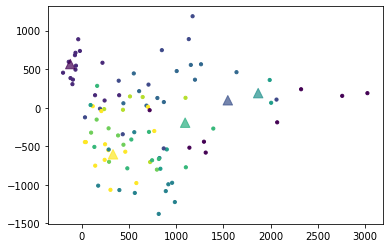

In [77]:
plt.scatter(X_train[:,0], X_train[:,1],s=10 ,c = label_train)
plt.scatter(X_val[:,0], X_val[:,1], c = label_pred, s = 90,marker='^', alpha = 0.7)

plt.show()


# Implementación
- En el metodo de la potencia verificamos al final que se trate de un autovector de X con precision epsilon
- 

# Metodo para parar el metodo de la potencia
- research
- sugerir en el informe las opciones evaluadas
- elegir 2/3 metodos y evaluar su eficiencia en base a la perfomance de tiempo y a distancia de los resultados obtenidos

# Experimentar con la k
- Encontrar primero del 1 al 200 de a saltos de a 10
- Hipotesis: va a estar entre los primeros ya que tener en cuenta demasiados puntos mas cercanos deja de tener sentido
- Luego concluir que esta entre los primeros y hacer del 1 al 20

# Experimentar con el alpha
- Research paper de buenos alphas
- **Experimentar**: Experimentacion similar a la de K pero el inicial talvez mejor hasta 600 o algo del estilo para tener un panorama mas completo ya que no se espepra que al aumentarlo empeore necesariamente


# Experimentar con la cantidad de instancias 
- para distintos k/alpha?


# Posible metodo KNN pesado
- Por orden(sencillo pero no tan bueno talvez)
- Por distancia con peso

# Metricas para determinar los resultados obtenidos que no son accuracy
- Accuracy
- Curvas de precisión
- Recall
- Kappa de Cohen
- F1 Score

# Formas de tomar la data para entrenar
- Ver la distribución de los datos
- Como tomarlos

# Otros requisitos
- Se pide realizar un estudio experimental de los métodos propuestos sobre una base de
entrenamiento utilizando la técnica K-fold cross validation mencionada anteriormente, con
el objetivo de analizar el poder de clasificación y encontrar los mejores parámetros de los
métodos. Se deberá trabajar al menos con la base de de datos MNIST, en la versión disponible
en kaggle para la competencia Digit Recognizer 2 .